In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
import math
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import t
import numpy as np

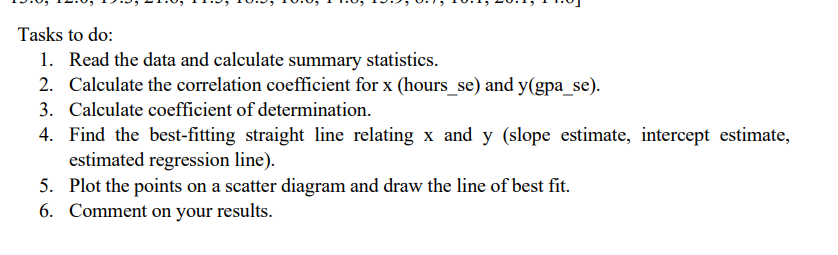

In [74]:
gpa_se = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

hours_se = [15.9, 15.0, 10.2, 12.2, 16.0, 16.2, 18.1, 7.7, 12.2, 22.1, 17.8, 13.8, 14.9,
15.7, 16.8, 15.7, 10.4, 14.9, 17.5, 11.8, 12.2, 12.7, 12.3, 12.0, 13.0, 15.3,
15.4, 13.8, 14.9, 12.6, 15.5, 16.6, 12.6, 16.6, 16.3, 14.5, 18.8, 15.1, 15.9,
13.6, 12.0, 19.3, 21.6, 11.5, 18.5, 16.6, 14.8, 15.9, 8.7, 10.1, 20.1, 14.6]

# 1.1. Read the data and calculate summary statistics.


In [75]:
Y=gpa_se
X=hours_se

In [76]:
sum_x = np.sum(gpa_se)
sum_x2 = np.sum([i*i for i in gpa_se])
print(sum_x)
print(sum_x2)

164.43
524.5357


In [77]:
sum_y = np.sum(hours_se)
sum_y2 = np.sum([i*i for i in hours_se])
print(sum_y)
print(sum_y2)

768.3000000000002
11815.449999999999


# 1.2. Calculate the correlation coefficient for x (hours_se) and y(gpa_se).



In [78]:
X1 = np.array(X).reshape((-1, 1))
y2 = np.array(Y)

model_lr = LinearRegression().fit(X1, y2)
R_sq = model_lr.score(X1, y2)
corr_coef = np.sqrt(R_sq)
print('Correlation coefficient:', np.round(corr_coef, 4))

Correlation coefficient: 0.849


# 1.3. Calculate coefficient of determination.


In [79]:
print('Coefficient of determination:', np.round(R_sq, 3))

Coefficient of determination: 0.721


In [80]:
n=len(hours_se)


# 1.4. Find the best-fitting straight line relating x and y (slope estimate, intercept estimate, estimated regression line).


In [81]:
intercept=np.round(model_lr.intercept_,3)
slope = np.round(model_lr.coef_,3)
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: 1.914
Slope: [0.084]


# Regression line

$$\hat{y} = 1.914 + 0.084x$$

In [82]:
X1 = np.array(X)
y2 = np.array(Y)
y_pred = intercept + slope*X1

In [109]:
y_pred

array([3.2496, 3.174 , 2.7708, 2.9388, 3.258 , 3.2748, 3.4344, 2.5608,
       2.9388, 3.7704, 3.4092, 3.0732, 3.1656, 3.2328, 3.3252, 3.2328,
       2.7876, 3.1656, 3.384 , 2.9052, 2.9388, 2.9808, 2.9472, 2.922 ,
       3.006 , 3.1992, 3.2076, 3.0732, 3.1656, 2.9724, 3.216 , 3.3084,
       2.9724, 3.3084, 3.2832, 3.132 , 3.4932, 3.1824, 3.2496, 3.0564,
       2.922 , 3.5352, 3.7284, 2.88  , 3.468 , 3.3084, 3.1572, 3.2496,
       2.6448, 2.7624, 3.6024, 3.1404])

# 1.5. Plot the points on a scatter diagram and draw the line of best fit.


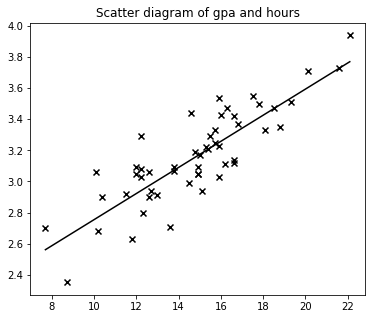

In [83]:
plt.figure(figsize=(6,5))
plt.scatter(X1, y2, c='black', marker='x') 
plt.plot([min(X1), max(X1)], [min(y_pred), max(y_pred)], color='black')  # regression line

plt.title('Scatter diagram of gpa and hours')
plt.show()

# 1.6. Comment on your results.

**As we could observe from the following codes , it can be seen that correlation coefficient for those two samples is 0.849 , that considered strong positive one . So , we did plot the line of the best fit on the scatterplot diagram using prediction values between gpa and hours , and their min and max values of X1 and y_pred variables . Also for the sake of usability we did measure summary statistics in order to know the sum and values of sum in square**

**Using scipy library I also did count variables of slope and intercept , so I could them plot into regression line , as the result I had following equation**

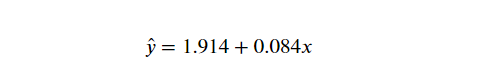

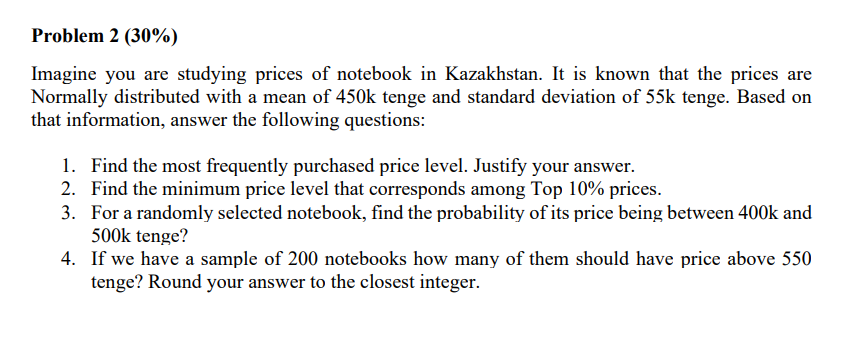

# 2.1. Find the most frequently purchased price level. Justify your answer.



$$mean=median=mode 
$$

**Based on the fact that mean , median and mode is equal. We can make assumption that most frequent purchase is equal to 450K Tenge**

# 2.2. Find the minimum price level that corresponds among Top 10% prices.


In [110]:
import scipy.stats as st 


In [111]:
task2 = st.norm.ppf(q=0.90, loc=450, scale=55) # ppf method is an inverce of cdf
print(np.round(task2,5))

520.48534


# 2.3. For a randomly selected notebook, find the probability of its price being between 400k and 500k tenge?


In [112]:
from scipy import stats
from scipy.stats import norm


task3 = st.norm.cdf(x=500, loc=450, scale=55) -  st.norm.cdf(x=400, loc=450, scale=55)
print(np.round(task3,5))


0.6367


# 2.4. If we have a sample of 200 notebooks how many of them should have price above 550 tenge? Round your answer to the closest integer

In [100]:
task4 = st.norm.sf(x=550, loc=450, scale=55)
print(np.round(task4,3)*200)

7.000000000000001


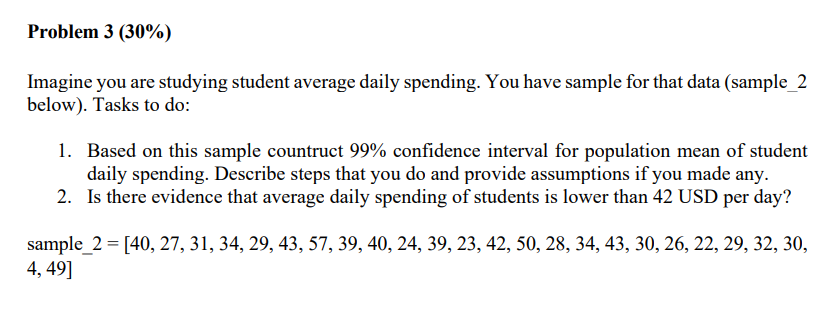

In [101]:
sample_2 = [40, 27, 31, 34, 29, 43, 57, 39, 40, 24, 39, 23, 42, 50, 28, 34, 43, 30, 26, 22, 29, 32, 30,
4, 49]

# 3.1. Based on this sample countruct 99% confidence interval for population mean of student daily spending. Describe steps that you do and provide assumptions if you made any

In [117]:
x_bar = np.mean(sample_2)
sigma = np.std(sample_2, ddof=1) 
n = len(sample_2)

In [108]:
std_error = sigma / np.sqrt(n)
print("x_bar: ", x_bar)
print("sigma: ", sigma)
print("std_error: ", std_error)

x_bar:  33.8
sigma:  10.927793311857004
std_error:  2.1855586623714007


**In this task I used T interval . So by the result we can see that sample that I used 'sample_2' has 25 items . So then, we can apply T interval here . As the result shows , it can be revealed that T interval method is lower than normal distribution , consequently this method more accurate in calculations .**

In [114]:

ci_99_t = t.interval(alpha=0.99, df=n-1, loc=x_bar, scale=std_error)
print('Lower bound:', round(ci_99_t[0], 3))
print('Upper bound:', round(ci_99_t[1], 3))

Lower bound: 27.687
Upper bound: 39.913


# 3.2. Is there an evidence that average daily spending of students is lower than 42 USD per day?


**The upper bound of 99% Confidence interval is lower than 42. Therefore , it can be revelaed that there is an evidence that average daily spending of students is lower than 42 USD per day.**

**Based on the following number of average we can say that Daily spending for this group is lower than 42 USD. So , this is the evidence .**

In [115]:
np.mean(sample_2)

33.8